In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
import random
from itertools import chain

plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kaon_pn_4GeV_Jul27_ntuple/*.root")




In [3]:
def pz_smear(pz):
    pz_array = []
    for part in pz:
        for element in part:
            if element <= 50:
                pz_perc = random.gauss(1,0.0404);
            elif element <= 100: 
                pz_perc = random.gauss(1,0.0410);
            elif element <= 250: 
                pz_perc = random.gauss(1,0.0415);
            elif element <= 500: 
                pz_perc = random.gauss(1,0.0420);
            elif element <= 1000: 
                pz_perc = random.gauss(1,0.0435);
            elif element <= 2000:  
                pz_perc = random.gauss(1,0.0477);
            elif element <= 3000:  
                pz_perc = random.gauss(1,0.0523);
            elif element <= 4000:  
                pz_perc = random.gauss(1,0.0573);            
            else:    
                pz_perc = random.gauss(1,0.06);
            pz_array=np.append(pz_array, [pz_perc])
    return (pz_array)

def px_smear(p):
    px_array = []
    for part in p:
        for element in part:
            if element <= 100:
                px_uncer = random.gauss(0,3.00);
            elif element <= 400: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 500: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 1000: 
                px_uncer = random.gauss(0,3.40);
            elif element <= 1300: 
                px_uncer = random.gauss(0,3.50);
            elif element <= 2000:  
                px_uncer = random.gauss(0,3.85);           
            else:    
                px_uncer = random.gauss(0,3.85);
            px_array=np.append(px_array, [px_uncer])
    return (px_array)

def py_smear(p):
    py_array = []
    for part in p:
        for element in part:
            if element <= 100:
                py_uncer = random.gauss(0,3.75);
            elif element <= 350: 
                py_uncer = random.gauss(0,3.80);
            elif element <= 500: 
                py_uncer = random.gauss(0,4.20);
            elif element <= 1000: 
                py_uncer = random.gauss(0,4.80);
            elif element <= 1200: 
                py_uncer = random.gauss(0,4.98);
            elif element <= 2000:  
                py_uncer = random.gauss(0,3.85);           
            else:    
                py_uncer = random.gauss(0,5.50);
            py_array=np.append(py_array, [py_uncer])
    return (py_array)

In [4]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x

In [5]:
hists = {}
hists["rec_mass"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_S$ Rec Mass [MeV]", 40, 0, 3500),
                                )
hists["rec_theta_mass"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$\theta _{dau1,dau2}<40^{\circ}$, $K_S$ Rec Mass [MeV]", 40, 0, 3500),
                                )

hists["rec"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_S$ Rec Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Recoil Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["rec_15"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_S$ Rec Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Recoil Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["rec_30"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_S$ Rec Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Recoil Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["rec_50"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_S$ Rec Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Recoil Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["rec_75"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$K_S$ Rec Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Recoil Electron Energy [MeV]", 40, 0, 1500),
                            )


hists["rec_theta"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$\theta _{dau1,dau2}<40^{\circ}$, $K_S$ Rec Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Recoil Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["rec_theta_15"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$\theta _{dau1,dau2}<40^{\circ}$, $K_S$ Rec Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Recoil Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["rec_theta_30"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$\theta _{dau1,dau2}<40^{\circ}$, $K_S$ Rec Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Recoil Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["rec_theta_50"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$\theta _{dau1,dau2}<40^{\circ}$, $K_S$ Rec Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Recoil Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["rec_theta_75"] = hist.Hist("Sim Particles",     
                                hist.Bin("k", r"$\theta _{dau1,dau2}<40^{\circ}$, $K_S$ Rec Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Recoil Electron Energy [MeV]", 40, 0, 1500),
                            )

hists["rec_purple"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_S$ Rec Kinetic Energy [MeV]", 80, 0, 3500),
                            )
hists["rec_blue"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_S$ Rec Kinetic Energy [MeV]", 80, 0, 2100),
                            )
hists["rec_green"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_S$ Rec Kinetic Energy [MeV]", 80, 0, 1500),
                            )
hists["rec_yellow"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_S$ Rec Kinetic Energy [MeV]", 80, 0, 1250),
                            )
hists["rec_red"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$K_S$ Rec Kinetic Energy [MeV]", 80, 0, 750),
                            )

hists["rec_theta_purple"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$\theta _{dau1,dau2}<40^{\circ}$, $K_S$ Rec Kinetic Energy [MeV]", 80, 0, 3500),
                            )
hists["rec_theta_blue"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$\theta _{dau1,dau2}<40^{\circ}$, $K_S$ Rec Kinetic Energy [MeV]", 80, 0, 2100),
                            )
hists["rec_theta_green"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$\theta _{dau1,dau2}<40^{\circ}$, $K_S$ Rec Kinetic Energy [MeV]", 80, 0, 1500),
                            )
hists["rec_theta_yellow"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$\theta _{dau1,dau2}<40^{\circ}$, $K_S$ Rec Kinetic Energy [MeV]", 80, 0, 1250),
                            )
hists["rec_theta_red"] = hist.Hist("Sim Particles",     
                                hist.Bin("e", r"$\theta _{dau1,dau2}<40^{\circ}$, $K_S$ Rec Kinetic Energy [MeV]", 80, 0, 750),
                            )

In [6]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)
    
    sim_particle = ldmx_events['Sim_PNParticle']
    sim_particle_n = ldmx_events['n']['Sim_PNParticle']
    sim_particle_dau1 = ldmx_events['Sim_PNParticle_dau1']
    sim_particle_dau2 = ldmx_events['Sim_PNParticle_dau2']
    
    pi_mass = 139.57039
    kaon_mass = 493.677
    
    decay_num_mask = sim_particle_dau2.momdecay == 2
    decay2_mask = abs(sim_particle_dau2.pdgID) == 211
    decay_mask = decay_num_mask & decay2_mask
    
    dau1 = get_vector(sim_particle_dau1[decay_mask])
    dau2 = get_vector(sim_particle_dau2[decay_mask])
    dausum = (dau1 + dau2)
    

    theta1_mask = (dau1.theta*180/math.pi <= 40)
    theta2_mask = (dau2.theta*180/math.pi <= 40)
    theta_mask = theta1_mask & theta2_mask
        
    n_pdgID_mask   = sim_particle[decay_mask].pdgID == 310    
    new_pdgID_mask = sim_particle[decay_mask][theta_mask].pdgID == 310
    
    n_px1 = px_smear(dau1.p)+flat(dau1.px)
    n_px2 = px_smear(dau2.p)+flat(dau2.px)
    n_py1 = py_smear(dau1.p)+flat(dau1.py)
    n_py2 = py_smear(dau2.p)+flat(dau2.py)
    n_pz1 = pz_smear(dau1.pz)*flat(dau1.pz)
    n_pz2 = pz_smear(dau2.pz)*flat(dau2.pz)
    n_psq1= n_px1**2+n_py1**2+n_pz1**2
    n_psq2= n_px2**2+n_py2**2+n_pz2**2
    n_e1 = (np.sqrt(n_psq1+pi_mass**2))
    n_e2 = (np.sqrt(n_psq2+pi_mass**2))
    
    new_px1 = px_smear(dau1[theta_mask].p)+flat(dau1[theta_mask].px)
    new_px2 = px_smear(dau2[theta_mask].p)+flat(dau2[theta_mask].px)
    new_py1 = py_smear(dau1[theta_mask].p)+flat(dau1[theta_mask].py)
    new_py2 = py_smear(dau2[theta_mask].p)+flat(dau2[theta_mask].py)
    new_pz1 = pz_smear(dau1[theta_mask].pz)*flat(dau1[theta_mask].pz)
    new_pz2 = pz_smear(dau2[theta_mask].pz)*flat(dau2[theta_mask].pz)
    new_psq1 = new_px1**2+new_py1**2+new_pz1**2
    new_psq2 = new_px2**2+new_py2**2+new_pz2**2
    new_e1 = (np.sqrt(new_psq1+pi_mass**2))
    new_e2 = (np.sqrt(new_psq2+pi_mass**2))
    
    
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)
    dau1_smear =  ak.zip({"x": n_px1,
                    "y": n_py1,
                    "z": n_pz1,
                    "t": n_e1,
                    },
                    with_name="LorentzVector")
    dau2_smear =  ak.zip({"x": n_px2,
                    "y": n_py2,
                    "z": n_pz2,
                    "t": n_e2,
                    },
                    with_name="LorentzVector")
    dausum_smear = dau1_smear + dau2_smear
    
    dau1_smeared =  ak.zip({"x": new_px1,
                    "y": new_py1,
                    "z": new_pz1,
                    "t": new_e1,
                    },
                    with_name="LorentzVector")
    dau2_smeared =  ak.zip({"x": new_px2,
                    "y": new_py2,
                    "z": new_pz2,
                    "t": new_e2,
                    },
                    with_name="LorentzVector")
    dausum_smeared = dau1_smeared + dau2_smeared
    
    hists["rec"].fill(
                                  k = flat(dausum_smear.t)-kaon_mass,
                                  e = flat(sim_particle_dau2[decay_mask].electrone),
                                 )  
    hists["rec_theta"].fill(
                                  k = flat(dausum_smeared.t)-kaon_mass,
                                  e = flat(sim_particle_dau2[decay_mask][theta_mask].electrone),
                                 )   
    
    
    #percent masks for less than 40 degrees  
    mask_test = (-1*(dausum_smear.t-kaon_mass)+720) <= flat(sim_particle_dau2[decay_mask].electrone)
    
    mask_15 = (-1*(dausum_smear.t-kaon_mass)+2100) <= flat(sim_particle_dau2[decay_mask].electrone)
    mask_30 = (-1*(dausum_smear.t-kaon_mass)+1550) <= flat(sim_particle_dau2[decay_mask].electrone)
    mask_50 = (-1*(dausum_smear.t-kaon_mass)+1170) <= flat(sim_particle_dau2[decay_mask].electrone)
    mask_75 = (-1*(dausum_smear.t-kaon_mass)+720)  <= flat(sim_particle_dau2[decay_mask].electrone)
#     numberl_100= flat(flat(sim_particle[klong_mask].e).shape)
#     numberl_75 = flat(flat(sim_particle[klong_mask][maskl_75].e).shape)
#     numberl_50 = flat(flat(sim_particle[klong_mask][maskl_50].e).shape)
#     numberl_30 = flat(flat(sim_particle[klong_mask][maskl_30].e).shape)
#     numberl_15 = flat(flat(sim_particle[klong_mask][maskl_15].e).shape)
    
    masks_15 =(-1*(dausum_smeared.t-kaon_mass)+2100) <= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
    masks_30 =(-1*(dausum_smeared.t-kaon_mass)+1550) <= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
    masks_50 =(-1*(dausum_smeared.t-kaon_mass)+1170) <= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
    masks_75 =(-1*(dausum_smeared.t-kaon_mass)+720)  <= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
#     numbers_100= flat(flat(sim_particle[kshort_mask].e).shape)
#     numbers_75 = flat(flat(sim_particle[kshort_mask][masks_75].e).shape)
#     numbers_50 = flat(flat(sim_particle[kshort_mask][masks_50].e).shape)
#     numbers_30 = flat(flat(sim_particle[kshort_mask][masks_30].e).shape)
#     numbers_15 = flat(flat(sim_particle[kshort_mask][masks_15].e).shape)
    
    acceptance_d = flat(flat(dausum_smear.t).shape)
    acceptance_n = flat(flat(dausum_smear[mask_test].t).shape)
    acceptance = flat(acceptance_n / acceptance_d)
#     print(acceptance_d)
#     print(acceptance_n)
#    print(acceptance)
    
    #fill histograms
    hists["rec_15"].fill(
                                 k = dausum_smear.t[mask_15]-kaon_mass,
                                 e = flat(sim_particle[decay_mask].electrone)[mask_15],
                                )
    hists["rec_30"].fill(
                                 k = dausum_smear.t[mask_30]-kaon_mass,
                                 e = flat(sim_particle[decay_mask].electrone)[mask_30],
                                )
    hists["rec_50"].fill(
                                 k = dausum_smear.t[mask_50]-kaon_mass,
                                 e = flat(sim_particle[decay_mask].electrone)[mask_50],
                                ) 
    hists["rec_75"].fill(
                                 k = dausum_smear.t[mask_75]-kaon_mass,
                                 e = flat(sim_particle[decay_mask].electrone)[mask_75],
                                )
    mask_15_up =(-1*(dausum_smear.t-kaon_mass)+2100) >= flat(sim_particle_dau2[decay_mask].electrone)
    mask_30_up =(-1*(dausum_smear.t-kaon_mass)+1550) >= flat(sim_particle_dau2[decay_mask].electrone)
    mask_50_up =(-1*(dausum_smear.t-kaon_mass)+1170) >= flat(sim_particle_dau2[decay_mask].electrone)
    mask_75_up =(-1*(dausum_smear.t-kaon_mass)+720) >= flat(sim_particle_dau2[decay_mask].electrone)
    
    hists["rec_purple"].fill(e = flat(dausum_smear.t[mask_15])-kaon_mass)    
    hists["rec_blue"].fill(e   = flat(dausum_smear.t[mask_30 & mask_15_up])-kaon_mass)    
    hists["rec_green"].fill(e  = flat(dausum_smear.t[mask_50 & mask_30_up])-kaon_mass)    
    hists["rec_yellow"].fill(e = flat(dausum_smear.t[mask_75 & mask_50_up])-kaon_mass)   
    hists["rec_red"].fill(e    = flat(dausum_smear.t[mask_75_up])-kaon_mass)    

    hists["rec_theta_15"].fill(
                                 k = dausum_smeared.t[masks_15]-kaon_mass,
                                 e = flat(sim_particle[decay_mask][theta_mask].electrone)[masks_15],
                                )
    hists["rec_theta_30"].fill(
                                 k = dausum_smeared.t[masks_30]-kaon_mass,
                                 e = flat(sim_particle[decay_mask][theta_mask].electrone)[masks_30],
                                )
    hists["rec_theta_50"].fill(
                                 k = dausum_smeared.t[masks_50]-kaon_mass,
                                 e = flat(sim_particle[decay_mask][theta_mask].electrone)[masks_50],
                                )
    hists["rec_theta_75"].fill(
                                 k = dausum_smeared.t[masks_75]-kaon_mass,
                                 e = flat(sim_particle[decay_mask][theta_mask].electrone)[masks_75],
                                )

    masks_15_up =(-1*(dausum_smeared.t-kaon_mass)+2100) >= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
    masks_30_up =(-1*(dausum_smeared.t-kaon_mass)+1550) >= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
    masks_50_up =(-1*(dausum_smeared.t-kaon_mass)+1170) >= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
    masks_75_up =(-1*(dausum_smeared.t-kaon_mass)+720) >= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
    
    hists["rec_theta_purple"].fill(e = flat(dausum_smeared.t[masks_15])-kaon_mass)    
    hists["rec_theta_blue"].fill(e   = flat(dausum_smeared.t[masks_30 & masks_15_up])-kaon_mass)    
    hists["rec_theta_green"].fill(e  = flat(dausum_smeared.t[masks_50 & masks_30_up])-kaon_mass)    
    hists["rec_theta_yellow"].fill(e = flat(dausum_smeared.t[masks_75 & masks_50_up])-kaon_mass)   
    hists["rec_theta_red"].fill(e    = flat(dausum_smeared.t[masks_75_up])-kaon_mass)    
    
    return acceptance
    
    
#     return acceptance, numberl_100, numberl_75, numberl_50, numberl_30, numberl_15

In [7]:
nchunk = 0
percent = 0

ltotal_100 = 0
ltotal_75 = 0
ltotal_50 = 0
ltotal_30 = 0
ltotal_15 = 0

for chunk in ldmx_dict:
    nchunk += 1
    print('process', nchunk) 
    returna = ProcessChunk(chunk, hists)
#     ltotal_100 += returna[1]
#     ltotal_75 += returna[2]
#     ltotal_50 += returna[3]
#     ltotal_30 += returna[4]
#     ltotal_15 += returna[5]
    percent += 100*returna[0]
#    print('percent', percent/nchunk, '%')
    print()
# print("Total :", ltotal_100)
# print("Top 75% :", ltotal_75)
# print("Top 50% :", ltotal_50)
# print("Top 30% :", ltotal_30)
# print("Top 15% :", ltotal_15)

process 1

process 2

process 3

process 4

process 5

process 6

process 7

process 8

process 9

process 10

process 11

process 12

process 13

process 14

process 15

process 16

process 17

process 18

process 19

process 20

process 21

process 22

process 23

process 24

process 25

process 26

process 27

process 28

process 29

process 30

process 31

process 32

process 33

process 34

process 35

process 36

process 37

process 38

process 39

process 40

process 41

process 42

process 43

process 44

process 45

process 46

process 47

process 48

process 49

process 50

process 51

process 52

process 53

process 54

process 55

process 56

process 57

process 58

process 59

process 60

process 61

process 62

process 63

process 64

process 65

process 66

process 67

process 68

process 69

process 70

process 71

process 72

process 73

process 74

process 75

process 76

process 77

process 78

process 79

process 80

process 81

process 82

process 83

process 84

p

<Hist (k,e) instance at 0x12f5ad2e0>


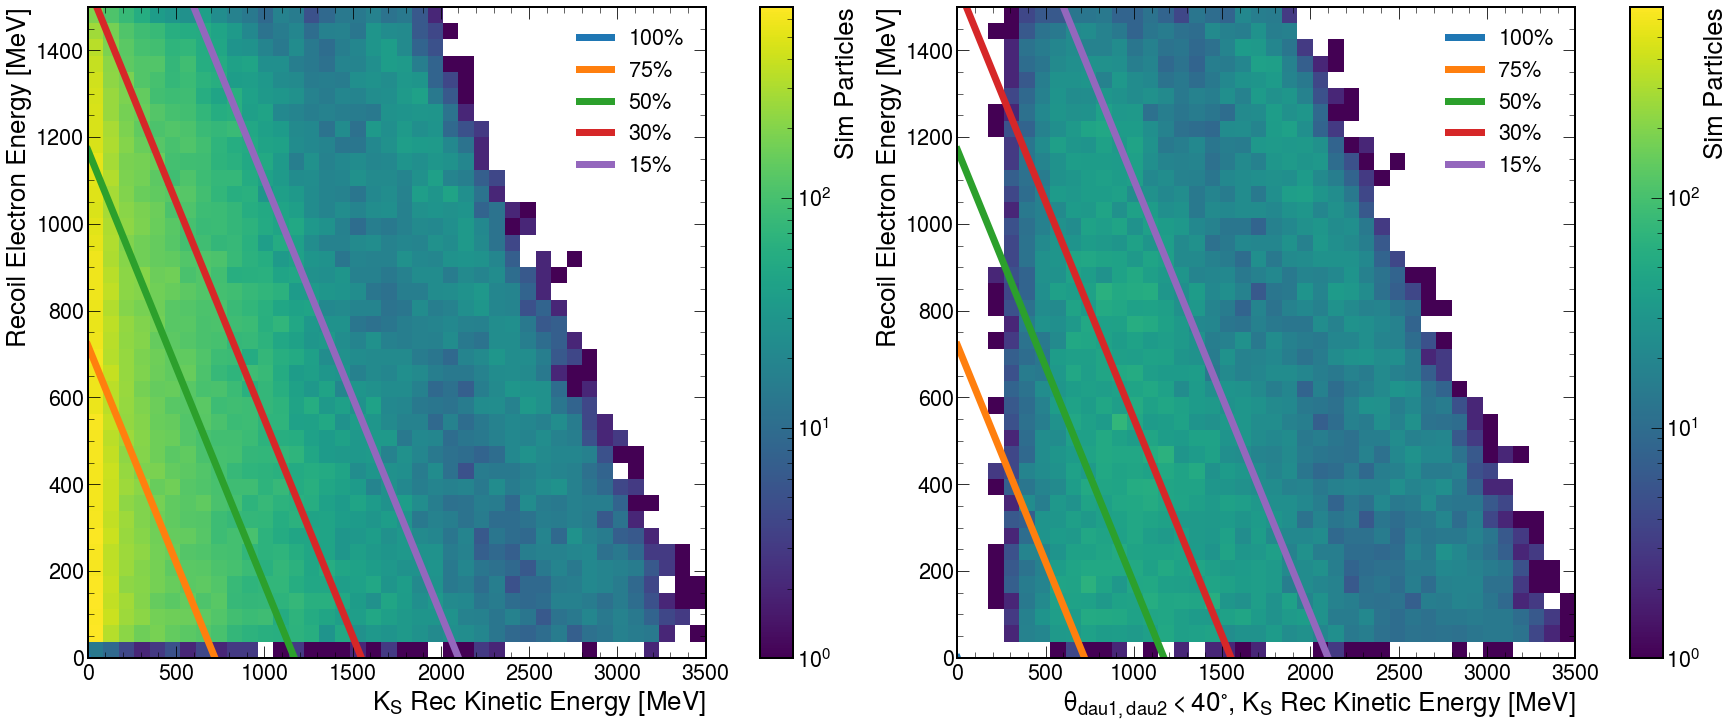

In [8]:
x = np.arange(0, 3500, 1)
line0  = -1* x + 5000
line15 = -1* x + 2100
line30 = -1* x + 1550
line50 = -1* x + 1170
line75 = -1* x + 720
line100 = -1*x

print(hists["rec"])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot2d(hists["rec"], xaxis='k', ax=ax[0], patch_opts=POPTS);
ax[0].plot(x, line100, '-', color='C0', linewidth=7.0)
ax[0].plot(x, line75, '-', color='C1', linewidth=7.0)
ax[0].plot(x, line50, '-', color='C2', linewidth=7.0)
ax[0].plot(x, line30, '-', color='C3', linewidth=7.0)
ax[0].plot(x, line15, '-', color='C4', linewidth=7.0)
leg = ax[0].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])


hist.plot2d(hists["rec_theta"], xaxis='k', ax=ax[1], patch_opts=POPTS);
ax[1].plot(x, line100, '-', color='C0', linewidth=7.0)
ax[1].plot(x, line75, '-', color='C1', linewidth=7.0)
ax[1].plot(x, line50, '-', color='C2', linewidth=7.0)
ax[1].plot(x, line30, '-', color='C3', linewidth=7.0)
ax[1].plot(x, line15, '-', color='C4', linewidth=7.0)
leg = ax[1].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])


<Hist (k,e) instance at 0x12f5ad2e0>


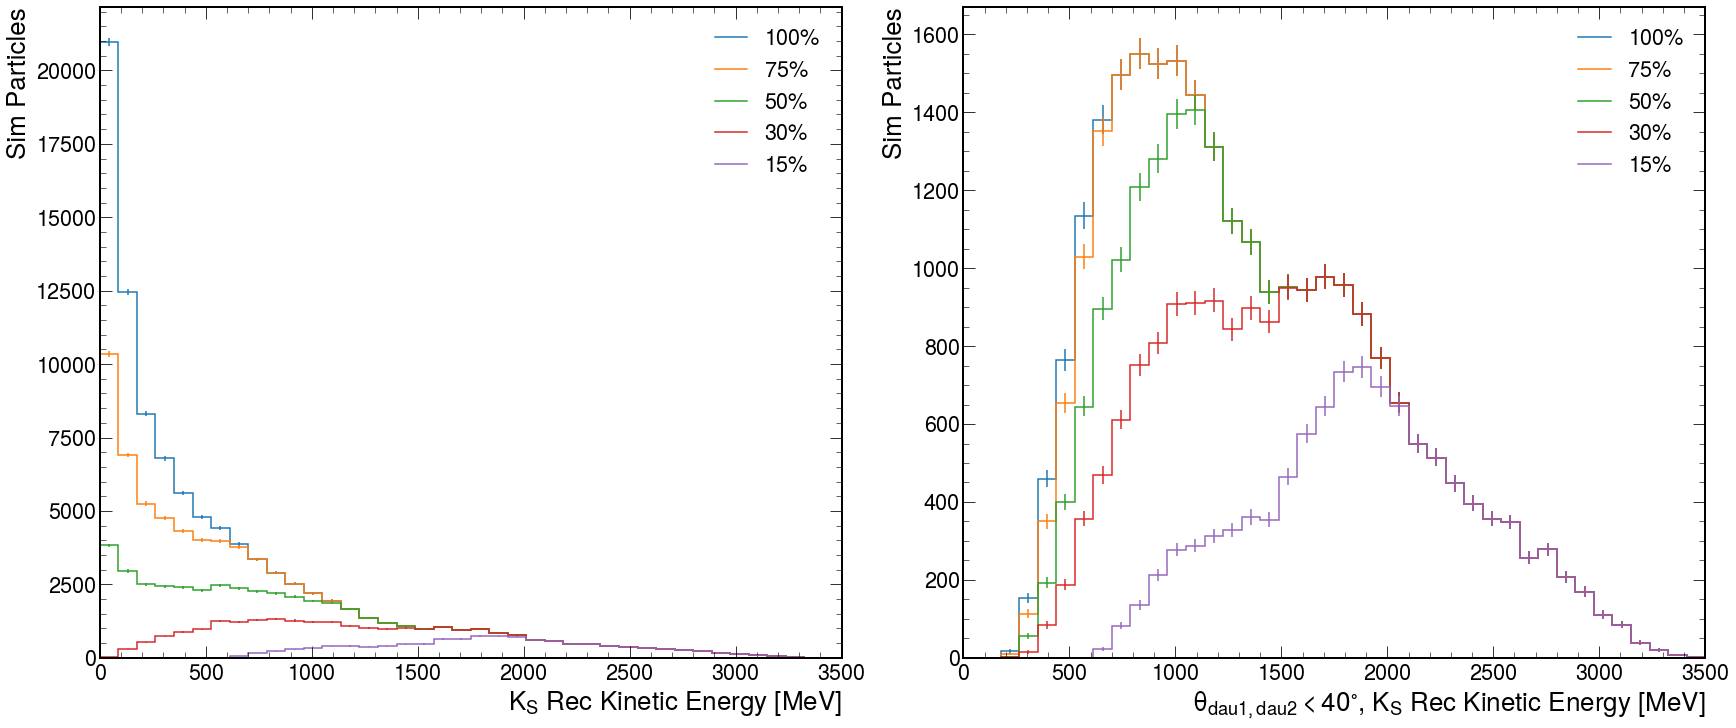

In [9]:
print(hists["rec"])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot1d(hists["rec"].integrate('e'), ax=ax[0], clear = False);
hist.plot1d(hists["rec_75"].integrate('e'), ax=ax[0], clear = False);
hist.plot1d(hists["rec_50"].integrate('e'), ax=ax[0], clear = False);
hist.plot1d(hists["rec_30"].integrate('e'), ax=ax[0], clear = False);
hist.plot1d(hists["rec_15"].integrate('e'), ax=ax[0], clear = False);
leg = ax[0].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])


hist.plot1d(hists["rec_theta"].integrate('e'), ax=ax[1], clear = False);
hist.plot1d(hists["rec_theta_75"].integrate('e'), ax=ax[1], clear = False);
hist.plot1d(hists["rec_theta_50"].integrate('e'), ax=ax[1], clear = False);
hist.plot1d(hists["rec_theta_30"].integrate('e'), ax=ax[1], clear = False);
hist.plot1d(hists["rec_theta_15"].integrate('e'), ax=ax[1], clear = False);
leg = ax[1].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])

<Hist (k,e) instance at 0x12f5ad2e0>
6259


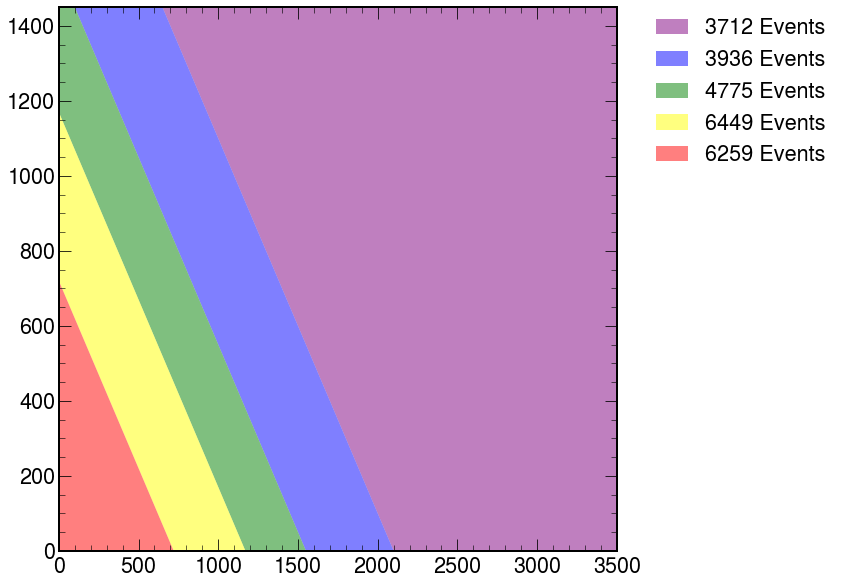

In [10]:
x = np.arange(0, 3500, 1)
line0  = -1* x + 5000
line15 = -1* x + 2100
line30 = -1* x + 1550
line50 = -1* x + 1170
line75 = -1* x + 720
line100 = -1*x

print(hists["rec"])
fig, ax = plt.subplots()
ax.fill_between(x, line0, line15, where=(line0 > line15), facecolor='purple', alpha=0.5)
ax.fill_between(x, line15, line30, where=(line15 > line30), facecolor='blue', alpha=0.5)
ax.fill_between(x, line30, line50, where=(line30 > line50), facecolor='green', alpha=0.5)
ax.fill_between(x, line50, line75, where=(line50 > line75), facecolor='yellow', alpha=0.5)
ax.fill_between(x, line75, line100, where=(line75 > line100), facecolor='red', alpha=0.5)

ax.set_xlim(0, 3500)
ax.set_ylim(0, 1450)
leg = ax.legend([r'3712 Events ', r'3936 Events', r'4775 Events', r'6449 Events', r'6259 Events' ], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#leg = ax.legend([r'100%', r'75%', r'50%', r'30%', r'15%' ], loc = 'upper right', borderaxespad=0.)

# Total : [25131]
# Top 75% : [18872]
# Top 50% : [12423]
# Top 30% : [7648]
# Top 15% : [3712]

print(25131-18872)

<Hist (e) instance at 0x10bcec340>


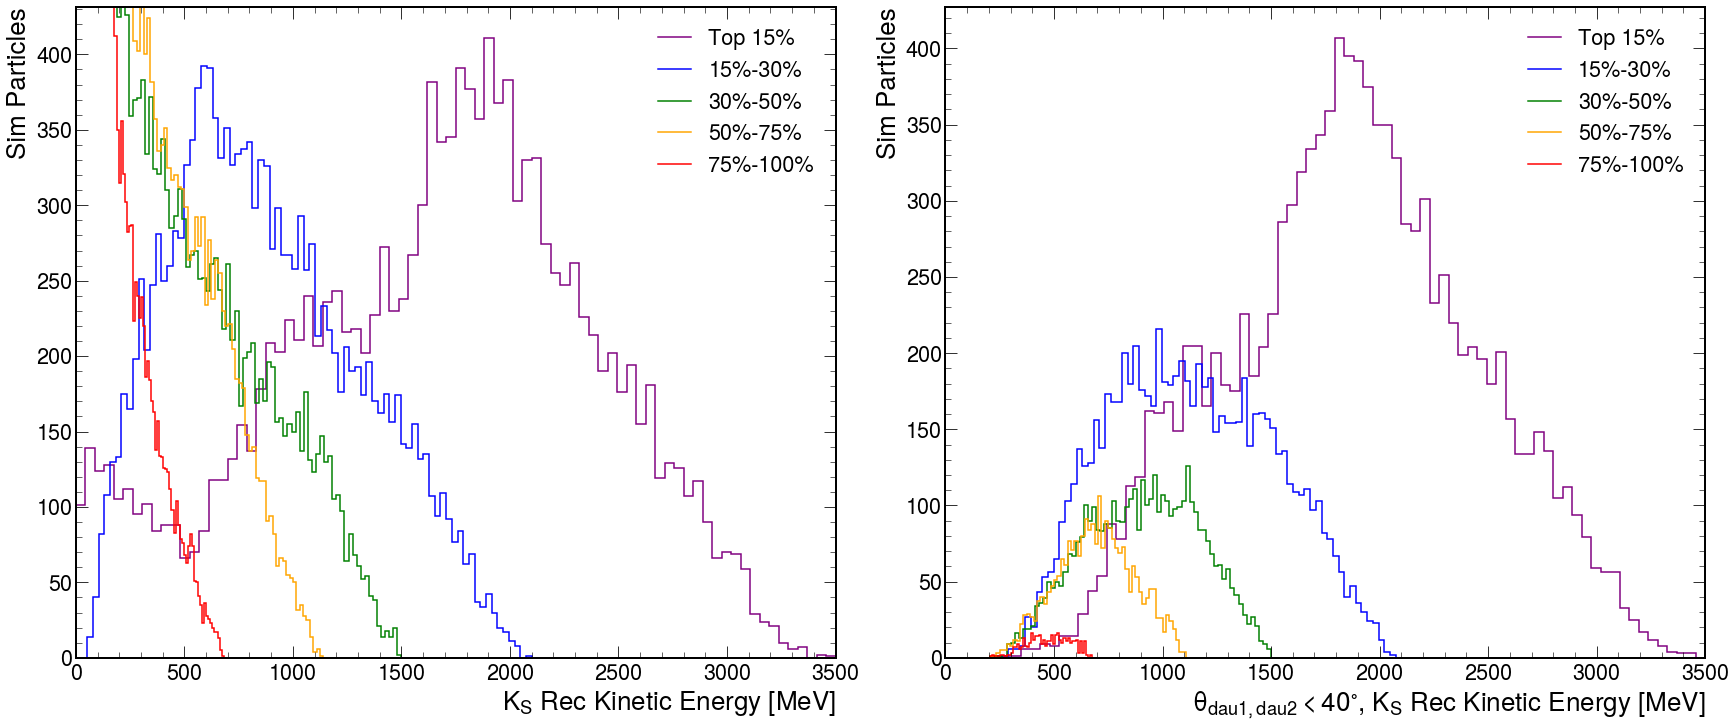

In [17]:
purple_line_opts = {'color': 'purple'}
blue_line_opts = {'color': 'blue'}
green_line_opts = {'color': 'green'}
yellow_line_opts = {'color': 'orange'}
red_line_opts = {'color': 'red'}


print(hists["rec_red"])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot1d(hists["rec_purple"], ax=ax[0], line_opts = purple_line_opts, clear = False);
hist.plot1d(hists["rec_blue"], ax=ax[0], line_opts = blue_line_opts, clear = False);
hist.plot1d(hists["rec_green"], ax=ax[0], line_opts = green_line_opts, clear = False);
hist.plot1d(hists["rec_yellow"], ax=ax[0], line_opts = yellow_line_opts, clear = False);
hist.plot1d(hists["rec_red"], ax=ax[0], line_opts = red_line_opts, clear = False);

#ax[0].set_ylim(0, 17500)
leg = ax[0].legend([r'Top 15%', r'15%-30%', r'30%-50%', r'50%-75%', r'75%-100%' ])

hist.plot1d(hists["rec_theta_purple"], ax=ax[1], line_opts = purple_line_opts, clear = False);
hist.plot1d(hists["rec_theta_blue"], ax=ax[1], line_opts = blue_line_opts, clear = False);
hist.plot1d(hists["rec_theta_green"], ax=ax[1], line_opts = green_line_opts, clear = False);
hist.plot1d(hists["rec_theta_yellow"], ax=ax[1], line_opts = yellow_line_opts, clear = False);
hist.plot1d(hists["rec_theta_red"], ax=ax[1], line_opts = red_line_opts, clear = False);

#ax[1].set_ylim(0, 17500)
leg = ax[1].legend([r'Top 15%', r'15%-30%', r'30%-50%', r'50%-75%', r'75%-100%' ])




<Hist (e) instance at 0x12f5846d0>
<Hist (e) instance at 0x12f584670>
<Hist (e) instance at 0x10bcec280>
<Hist (e) instance at 0x10bcec400>
<Hist (e) instance at 0x10bcec340>


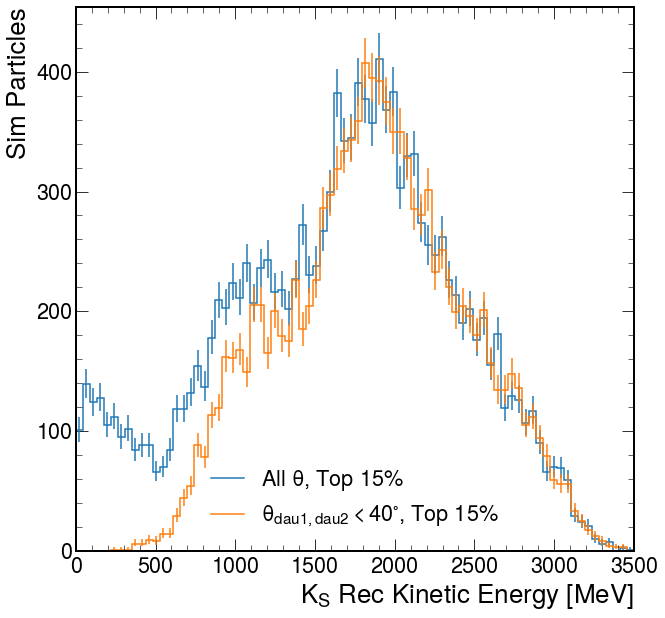

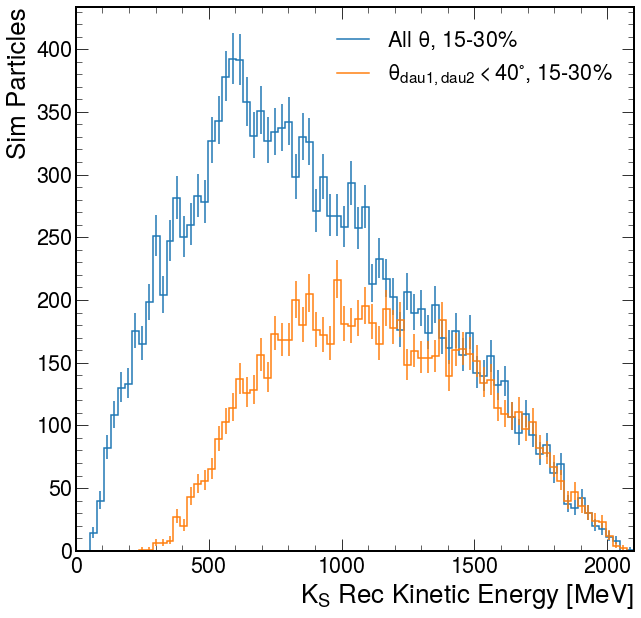

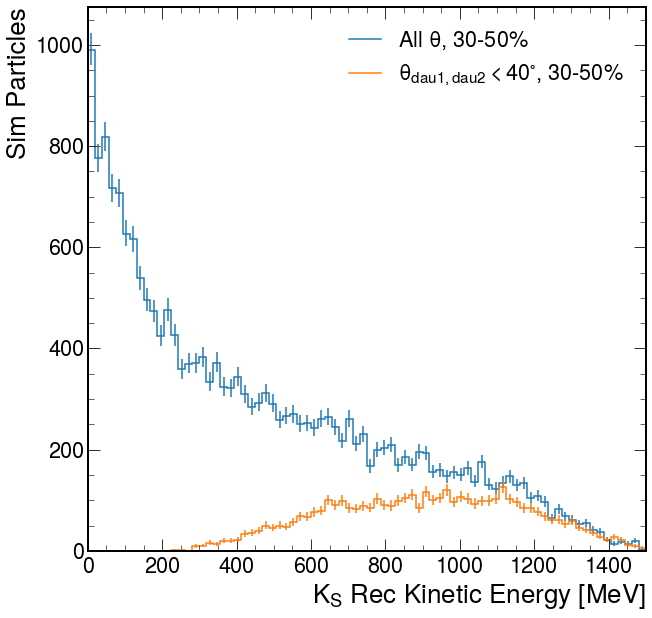

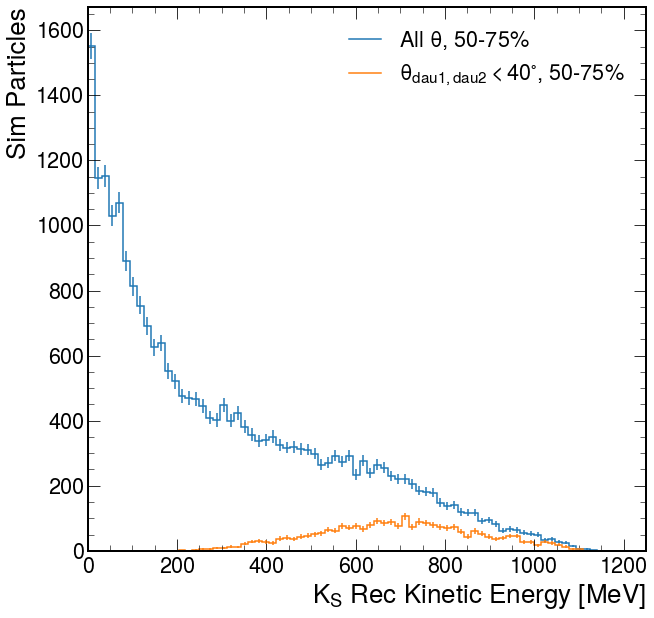

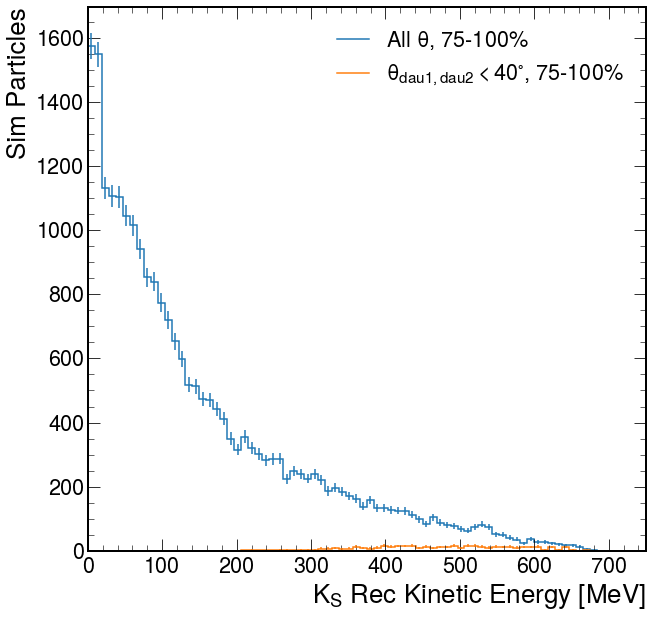

In [12]:
purple_line_opts = {'color': 'purple'}
blue_line_opts = {'color': 'blue'}
green_line_opts = {'color': 'green'}
yellow_line_opts = {'color': 'orange'}
red_line_opts = {'color': 'red'}


print(hists["rec_purple"])
fig, ax = plt.subplots()
hist.plot1d(hists["rec_purple"], ax=ax, clear = False);
hist.plot1d(hists["rec_theta_purple"], ax=ax, clear = False);
ax.set_xlabel(r'$K_S$ Rec Kinetic Energy [MeV]')
leg = ax.legend([r'All $\theta$, Top 15%',r'$\theta _{dau1,dau2}<40^{\circ}$, Top 15%', ])

print(hists["rec_blue"])
fig, ax = plt.subplots()
hist.plot1d(hists["rec_blue"], ax=ax, clear = False);
hist.plot1d(hists["rec_theta_blue"], ax=ax, clear = False);
ax.set_xlabel(r'$K_S$ Rec Kinetic Energy [MeV]')
leg = ax.legend([r'All $\theta$, 15-30%',r'$\theta _{dau1,dau2}<40^{\circ}$, 15-30%', ])

print(hists["rec_green"])
fig, ax = plt.subplots()
hist.plot1d(hists["rec_green"], ax=ax, clear = False);
hist.plot1d(hists["rec_theta_green"], ax=ax, clear = False);
ax.set_xlabel(r'$K_S$ Rec Kinetic Energy [MeV]')
leg = ax.legend([r'All $\theta$, 30-50%',r'$\theta _{dau1,dau2}<40^{\circ}$, 30-50%', ])

print(hists["rec_yellow"])
fig, ax = plt.subplots()
hist.plot1d(hists["rec_yellow"], ax=ax, clear = False);
hist.plot1d(hists["rec_theta_yellow"], ax=ax, clear = False);
ax.set_xlabel(r'$K_S$ Rec Kinetic Energy [MeV]')
leg = ax.legend([r'All $\theta$, 50-75%',r'$\theta _{dau1,dau2}<40^{\circ}$, 50-75%', ])

print(hists["rec_red"])
fig, ax = plt.subplots()
hist.plot1d(hists["rec_red"], ax=ax, clear = False);
hist.plot1d(hists["rec_theta_red"], ax=ax, clear = False);
ax.set_xlabel(r'$K_S$ Rec Kinetic Energy [MeV]')
leg = ax.legend([r'All $\theta$, 75-100%',r'$\theta _{dau1,dau2}<40^{\circ}$, 75-100%', ])



/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:38: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) -

Text(1, 0, '$K_S$ Rec Kinetic Energy [MeV]')

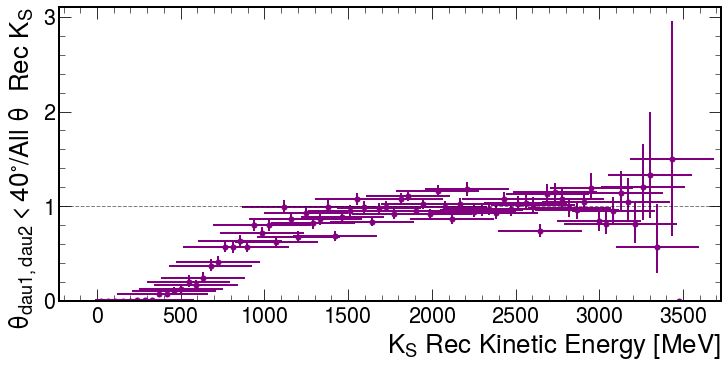

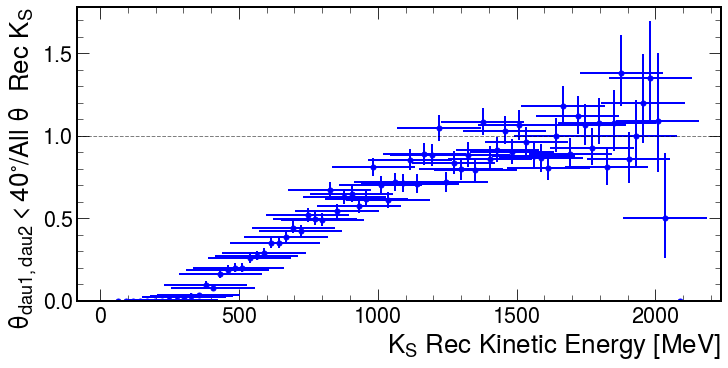

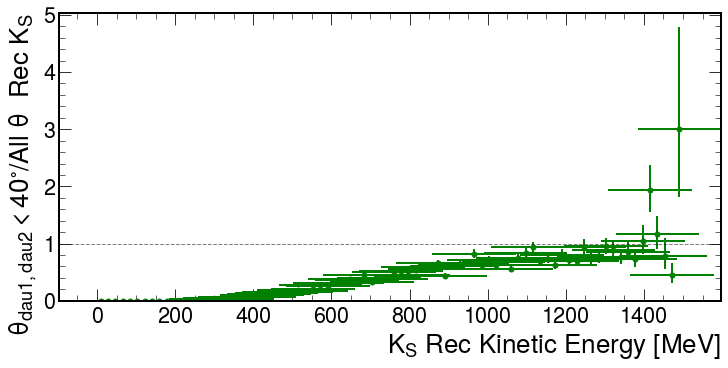

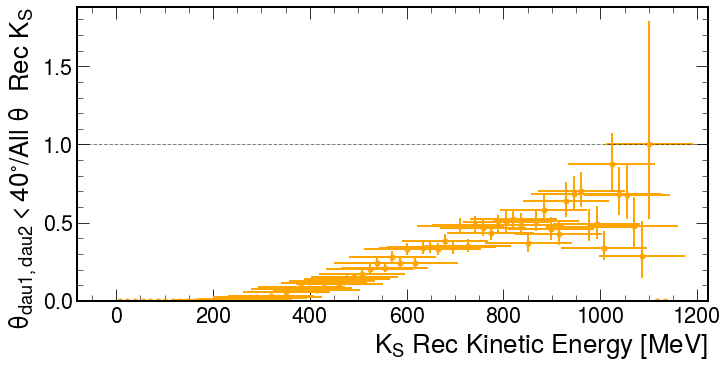

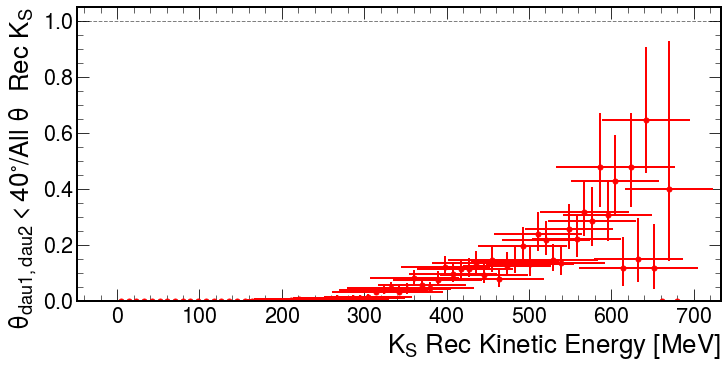

In [13]:
numerator_purple = hists["rec_theta_purple"]
denominator_purple = hists["rec_purple"]
purple_opts = {'linestyle': 'none','marker': '.','markersize': 10., 'color': 'purple','elinewidth': 2,'xerr': 250}
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_purple, denom=denominator_purple,ax=ax, error_opts=purple_opts,guide_opts={},unc='num')
ax.set_ylabel('$K_L$/$K_S$')
#ax.set_ylim(0.8,1.2)
ax.set_xlabel(r'$K_S$ Rec Kinetic Energy [MeV]')
ax.set_ylabel(r'$\theta _{dau1,dau2}<40^{\circ}$/All $\theta$  Rec $K_S$')

numerator_blue = hists["rec_theta_blue"]
denominator_blue = hists["rec_blue"]
blue_opts = {'linestyle': 'none','marker': '.','markersize': 10., 'color': 'blue','elinewidth': 2,'xerr': 150}
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_blue, denom=denominator_blue,ax=ax, error_opts=blue_opts,guide_opts={},unc='num')
ax.set_ylabel(r'$\theta _{dau1,dau2}<40^{\circ}$/All $\theta$  Rec $K_S$')
ax.set_xlabel(r'$K_S$ Rec Kinetic Energy [MeV]')

numerator_green = hists["rec_theta_green"]
denominator_green = hists["rec_green"]
green_opts = {'linestyle': 'none','marker': '.','markersize': 10., 'color': 'green','elinewidth': 2,'xerr': 107.1}
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_green, denom=denominator_green,ax=ax, error_opts=green_opts,guide_opts={},unc='num')
ax.set_ylabel(r'$\theta _{dau1,dau2}<40^{\circ}$/All $\theta$  Rec $K_S$')
ax.set_xlabel(r'$K_S$ Rec Kinetic Energy [MeV]')

numerator_yellow = hists["rec_theta_yellow"]
denominator_yellow = hists["rec_yellow"]
yellow_opts = {'linestyle': 'none','marker': '.','markersize': 10., 'color': 'orange','elinewidth': 2,'xerr': 89.3}
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_yellow, denom=denominator_yellow,ax=ax, error_opts=yellow_opts,guide_opts={},unc='num')
ax.set_ylabel(r'$\theta _{dau1,dau2}<40^{\circ}$/All $\theta$  Rec $K_S$')
ax.set_xlabel(r'$K_S$ Rec Kinetic Energy [MeV]')

numerator_red = hists["rec_theta_red"]
denominator_red = hists["rec_red"]
red_opts = {'linestyle': 'none','marker': '.','markersize': 10., 'color': 'red','elinewidth': 2,'xerr': 53.6}
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_red, denom=denominator_red,ax=ax, error_opts=red_opts,guide_opts={},unc='num')
ax.set_ylabel(r'$\theta _{dau1,dau2}<40^{\circ}$/All $\theta$  Rec $K_S$')
ax.set_xlabel(r'$K_S$ Rec Kinetic Energy [MeV]')



/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:38: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: divide by zero encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) -

Text(1, 0, '$K_S$ Rec Kinetic Energy [MeV]')

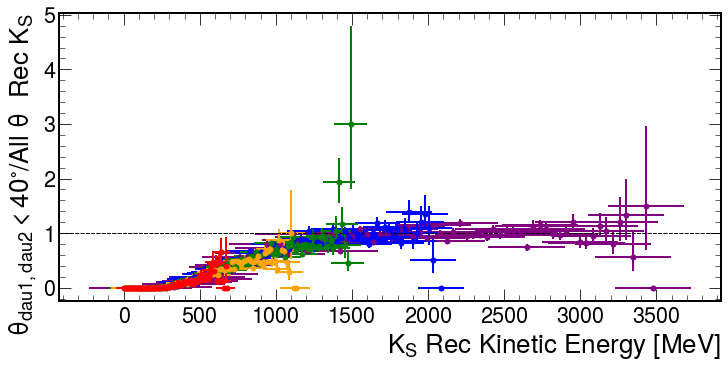

In [14]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
hist.plotratio(num=numerator_purple, denom=denominator_purple,ax=ax, error_opts=purple_opts,guide_opts={},unc='num', clear = False)
hist.plotratio(num=numerator_blue, denom=denominator_blue,ax=ax, error_opts=blue_opts,guide_opts={},unc='num', clear = False)
hist.plotratio(num=numerator_green, denom=denominator_green,ax=ax, error_opts=green_opts,guide_opts={},unc='num', clear = False)
hist.plotratio(num=numerator_yellow, denom=denominator_yellow,ax=ax, error_opts=yellow_opts,guide_opts={},unc='num', clear = False)
hist.plotratio(num=numerator_red, denom=denominator_red,ax=ax, error_opts=red_opts,guide_opts={},unc='num', clear = False)

ax.set_ylabel(r'$\theta _{dau1,dau2}<40^{\circ}$/All $\theta$  Rec $K_S$')
ax.set_xlabel(r'$K_S$ Rec Kinetic Energy [MeV]')


<Hist (k,e) instance at 0x12f5ad2e0>
6259


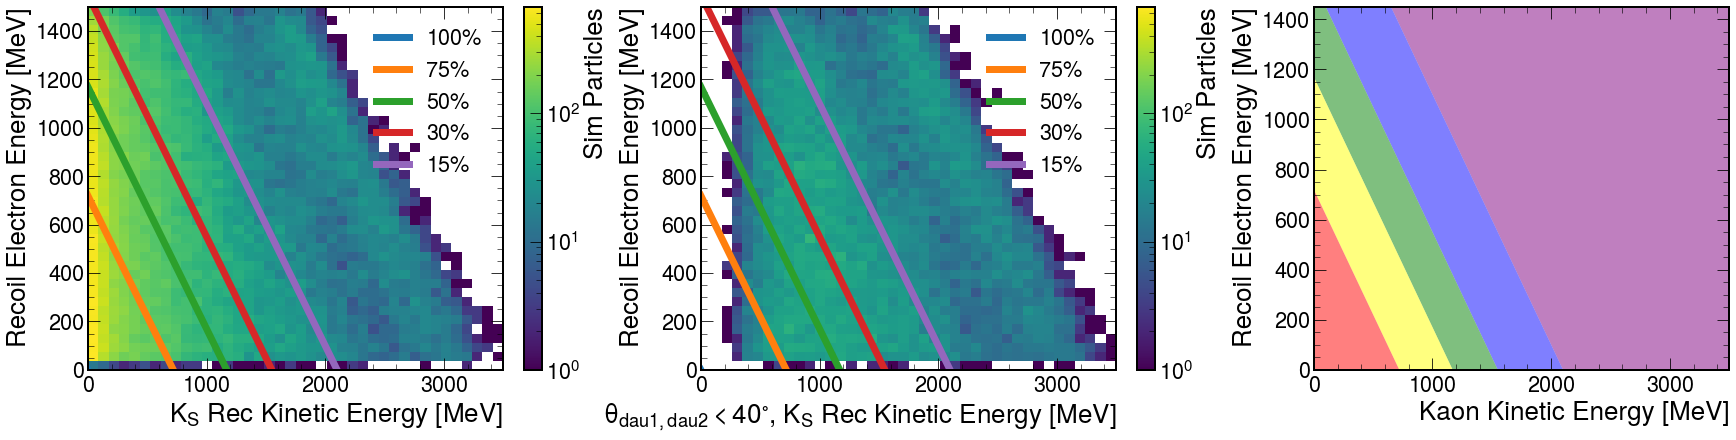

In [15]:
x = np.arange(0, 3500, 1)
line0  = -1* x + 5000
line15 = -1* x + 2100
line30 = -1* x + 1550
line50 = -1* x + 1170
line75 = -1* x + 720
line100 = -1*x

print(hists["rec"])
fig, ax = plt.subplots(1,3,figsize=(24,6), constrained_layout=True)
hist.plot2d(hists["rec"], xaxis='k', ax=ax[0], patch_opts=POPTS);
ax[0].plot(x, line100, '-', color='C0', linewidth=7.0)
ax[0].plot(x, line75, '-', color='C1', linewidth=7.0)
ax[0].plot(x, line50, '-', color='C2', linewidth=7.0)
ax[0].plot(x, line30, '-', color='C3', linewidth=7.0)
ax[0].plot(x, line15, '-', color='C4', linewidth=7.0)
leg = ax[0].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])


hist.plot2d(hists["rec_theta"], xaxis='k', ax=ax[1], patch_opts=POPTS);
ax[1].plot(x, line100, '-', color='C0', linewidth=7.0)
ax[1].plot(x, line75, '-', color='C1', linewidth=7.0)
ax[1].plot(x, line50, '-', color='C2', linewidth=7.0)
ax[1].plot(x, line30, '-', color='C3', linewidth=7.0)
ax[1].plot(x, line15, '-', color='C4', linewidth=7.0)
leg = ax[1].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])

x = np.arange(0, 3500, 1)
line0  = -1* x + 5000
line15 = -1* x + 2100
line30 = -1* x + 1550
line50 = -1* x + 1170
line75 = -1* x + 720
line100 = -1*x


ax[2].fill_between(x, line0, line15, where=(line0 > line15), facecolor='purple', alpha=0.5)
ax[2].fill_between(x, line15, line30, where=(line15 > line30), facecolor='blue', alpha=0.5)
ax[2].fill_between(x, line30, line50, where=(line30 > line50), facecolor='green', alpha=0.5)
ax[2].fill_between(x, line50, line75, where=(line50 > line75), facecolor='yellow', alpha=0.5)
ax[2].fill_between(x, line75, line100, where=(line75 > line100), facecolor='red', alpha=0.5)

ax[2].set_xlim(0, 3500)
ax[2].set_ylim(0, 1450)
ax[2].set_xlabel(r'Kaon Kinetic Energy [MeV]')
ax[2].set_ylabel(r'Recoil Electron Energy [MeV]')
#leg = ax.legend([r'3712 Events ', r'3936 Events', r'4775 Events', r'6449 Events', r'6259 Events' ], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#leg = ax.legend([r'100%', r'75%', r'50%', r'30%', r'15%' ], loc = 'upper right', borderaxespad=0.)

# Total : [25131]
# Top 75% : [18872]
# Top 50% : [12423]
# Top 30% : [7648]
# Top 15% : [3712]

print(25131-18872)


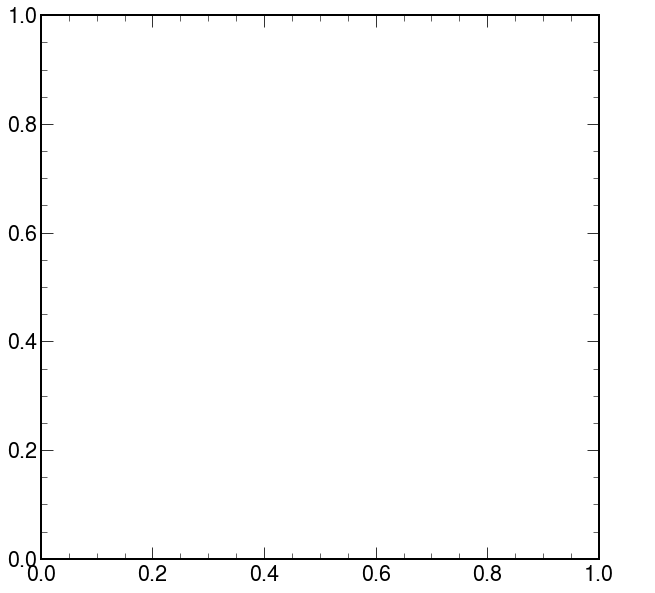

In [16]:
fig, ax = plt.subplots()
leg = ax.legend([r'3712 Events ', r'3936 Events', r'4775 Events', r'6449 Events', r'6259 Events' ], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



<Hist (k,e) instance at 0x12f5ad2e0>


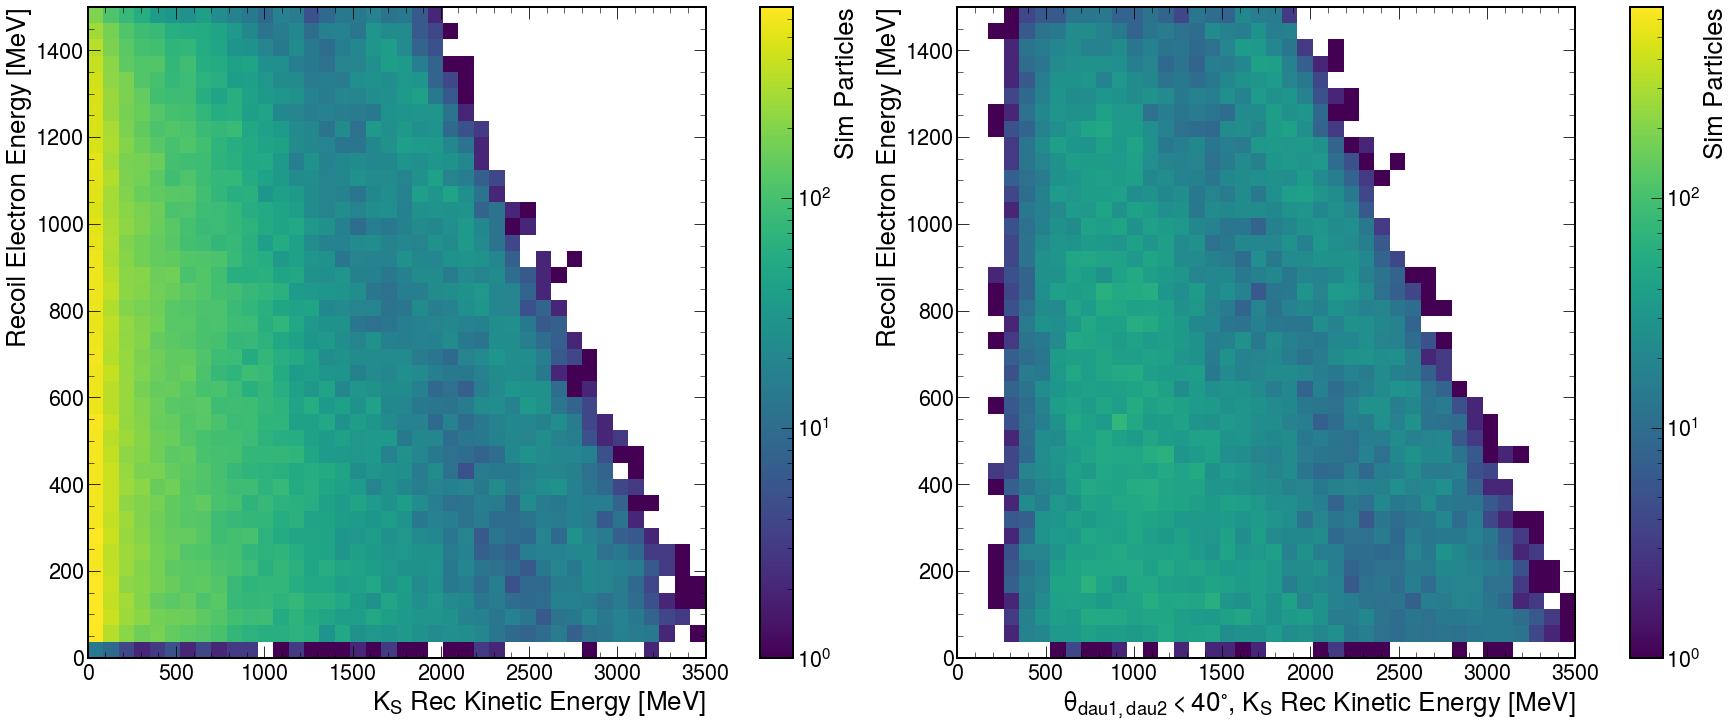

In [18]:
x = np.arange(0, 3500, 1)
line0  = -1* x + 5000
line15 = -1* x + 2100
line30 = -1* x + 1550
line50 = -1* x + 1170
line75 = -1* x + 720
line100 = -1*x

print(hists["rec"])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot2d(hists["rec"], xaxis='k', ax=ax[0], patch_opts=POPTS);



hist.plot2d(hists["rec_theta"], xaxis='k', ax=ax[1], patch_opts=POPTS);
